<h1>OLIMOV AMIR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, roc_auc_score, auc, roc_curve, precision_score, 
                             recall_score, f1_score)
import warnings
import datetime
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_excel("balanced_data.xlsx")
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,7009,4/9/2020 22:29,4870000000000000,fraud_Pouros-Conroy,shopping_pos,1320.99,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,10/3/1974,040f332c0ee7d6650447504c1833edcc,1378333799,48.969387,-123.242887,0
1,6976,30/09/2020 23:41,180000000000000,"fraud_Daugherty, Pouros and Beahan",shopping_pos,1320.92,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,17/03/2002,1352f5f821b77b49df4bc2329e5e249e,1380584498,39.679602,-97.038867,1
2,3979,15/08/2020 02:08,4630000000000000,fraud_Botsford Ltd,shopping_pos,1319.97,Mackenzie,Smith,F,7178 Willis Drive,...,41.6414,-96.5232,1745,"Engineer, automotive",26/12/1973,3f039e6f6df9f883e39f3b7b6b782a9c,1376532483,42.276801,-95.911843,1
3,4039,2/12/2020 22:27,3590000000000000,fraud_Torphy-Goyette,shopping_pos,1318.89,Jason,Johnson,M,5942 Thomas Park,...,55.4732,-133.1171,1920,Commissioning editor,17/06/1997,2682f81f3f9e070b7abc721ca4bd5862,1386023256,54.801713,-133.669108,1
4,2822,22/08/2020 08:20,372000000000000,"fraud_Hayes, Marquardt and Dibbert",misc_net,1311.94,Rick,Martinez,M,062 Poole Hollow Apt. 815,...,44.3566,-103.6999,1979,Multimedia programmer,13/03/1970,4cece54fa9198712fe431b82019a3e5a,1377159632,44.617808,-103.081882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,787,27/12/2020 05:51,4120000000000000,"fraud_Weimann, Kuhic and Beahan",shopping_pos,1.83,Melinda,Gutierrez,F,1497 West Gateway,...,40.7152,-89.2706,6713,Archivist,19/08/1945,19fa819206a08ff1ee753c4a1e95f043,1388123483,41.104669,-88.393148,0
8139,4386,2/12/2020 15:29,3500000000000000,"fraud_Haley, Jewess and Bechtelar",shopping_pos,1.83,Scott,Martin,M,31472 Cody Place Suite 740,...,39.0298,-77.0793,19054,Operations geologist,8/9/1976,9753eda04ccca06935c35c60d033df5c,1385998170,39.251400,-76.502773,0
8140,4486,14/09/2020 20:56,30200000000000,fraud_Haley Group,misc_pos,1.83,Theresa,Powell,F,117 Natasha Vista Suite 936,...,33.4044,-96.2238,4090,Sub,23/03/1977,332ee4e1e493dd906b8fd5532294cf58,1379192191,33.005286,-95.343504,0
8141,7537,10/8/2020 1:09,4220000000000000000,fraud_Abshire PLC,entertainment,1.83,Bethany,Andrade,F,7898 Wanda Springs,...,33.8419,-117.6043,233717,Wellsite geologist,22/05/1966,66ad5129671aa358380d44949f724240,1376096966,33.538604,-118.225232,0


<h1>Очистка и анализ данных

In [3]:
data.dropna
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
data.nunique()

Unnamed: 0               8143
trans_date_trans_time    7972
cc_num                    318
merchant                  693
category                   14
amt                      6453
first                     338
last                      464
gender                      2
street                    904
city                      834
state                      50
zip                       893
lat                       891
long                      891
city_pop                  820
job                       469
dob                       891
trans_num                8143
unix_time                8140
merch_lat                8143
merch_long               8141
is_fraud                    2
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8143 non-null   int64  
 1   trans_date_trans_time  8143 non-null   object 
 2   cc_num                 8143 non-null   int64  
 3   merchant               8143 non-null   object 
 4   category               8143 non-null   object 
 5   amt                    8143 non-null   float64
 6   first                  8143 non-null   object 
 7   last                   8143 non-null   object 
 8   gender                 8143 non-null   object 
 9   street                 8143 non-null   object 
 10  city                   8143 non-null   object 
 11  state                  8143 non-null   object 
 12  zip                    8143 non-null   int64  
 13  lat                    8143 non-null   float64
 14  long                   8143 non-null   float64
 15  city

In [7]:
data.shape

(8143, 23)

In [64]:
data[data['is_fraud'] == 1]['gender'].value_counts()

gender
F    1163
M     981
Name: count, dtype: int64

In [8]:
data['is_fraud'].value_counts()

is_fraud
0    5999
1    2144
Name: count, dtype: int64

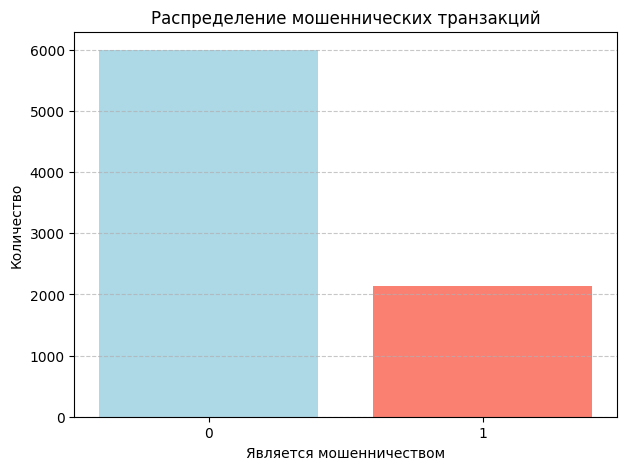

In [9]:
import matplotlib.pyplot as plt

value_counts = data['is_fraud'].value_counts()
plt.figure(figsize=(7, 5))
plt.bar(value_counts.index.astype(str), value_counts.values, color=['lightblue', 'salmon'])
plt.xlabel('Является мошенничеством')
plt.ylabel('Количество')
plt.title('Распределение мошеннических транзакций')
plt.xticks(rotation=0)  # Поворот меток по оси X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
data['merchant'] = data['merchant'].str.replace("fraud_", "")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,7009,4/9/2020 22:29,4870000000000000,Pouros-Conroy,shopping_pos,1320.99,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,10/3/1974,040f332c0ee7d6650447504c1833edcc,1378333799,48.969387,-123.242887,0
1,6976,30/09/2020 23:41,180000000000000,"Daugherty, Pouros and Beahan",shopping_pos,1320.92,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,17/03/2002,1352f5f821b77b49df4bc2329e5e249e,1380584498,39.679602,-97.038867,1
2,3979,15/08/2020 02:08,4630000000000000,Botsford Ltd,shopping_pos,1319.97,Mackenzie,Smith,F,7178 Willis Drive,...,41.6414,-96.5232,1745,"Engineer, automotive",26/12/1973,3f039e6f6df9f883e39f3b7b6b782a9c,1376532483,42.276801,-95.911843,1
3,4039,2/12/2020 22:27,3590000000000000,Torphy-Goyette,shopping_pos,1318.89,Jason,Johnson,M,5942 Thomas Park,...,55.4732,-133.1171,1920,Commissioning editor,17/06/1997,2682f81f3f9e070b7abc721ca4bd5862,1386023256,54.801713,-133.669108,1
4,2822,22/08/2020 08:20,372000000000000,"Hayes, Marquardt and Dibbert",misc_net,1311.94,Rick,Martinez,M,062 Poole Hollow Apt. 815,...,44.3566,-103.6999,1979,Multimedia programmer,13/03/1970,4cece54fa9198712fe431b82019a3e5a,1377159632,44.617808,-103.081882,0


In [11]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['year_month'] = data['trans_date_trans_time'].dt.to_period('M').astype("str")
data['weekday'] = data['trans_date_trans_time'].dt.weekday
data['time'] = data['trans_date_trans_time'].dt.time
data['dob'] = pd.to_datetime(data['dob'], format='%d/%m/%Y')
data['age'] = (2020 - data['dob'].dt.year)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,year,month,year_month,weekday,time,age
0,7009,2020-09-04 22:29:00,4870000000000000,Pouros-Conroy,shopping_pos,1320.99,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,1378333799,48.969387,-123.242887,0,2020,9,2020-09,4,22:29:00,46
1,6976,2020-09-30 23:41:00,180000000000000,"Daugherty, Pouros and Beahan",shopping_pos,1320.92,John,Lewis,M,7908 Derrick Mount,...,1380584498,39.679602,-97.038867,1,2020,9,2020-09,2,23:41:00,18
2,3979,2020-08-15 02:08:00,4630000000000000,Botsford Ltd,shopping_pos,1319.97,Mackenzie,Smith,F,7178 Willis Drive,...,1376532483,42.276801,-95.911843,1,2020,8,2020-08,5,02:08:00,47
3,4039,2020-12-02 22:27:00,3590000000000000,Torphy-Goyette,shopping_pos,1318.89,Jason,Johnson,M,5942 Thomas Park,...,1386023256,54.801713,-133.669108,1,2020,12,2020-12,2,22:27:00,23
4,2822,2020-08-22 08:20:00,372000000000000,"Hayes, Marquardt and Dibbert",misc_net,1311.94,Rick,Martinez,M,062 Poole Hollow Apt. 815,...,1377159632,44.617808,-103.081882,0,2020,8,2020-08,5,08:20:00,50


In [12]:
data[(data['age'] == 15) | (data['age'] == 17)]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,year,month,year_month,weekday,time,age
2015,3893,2020-12-11 16:48:00,36500000000000,Huel Ltd,misc_net,167.29,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,1386780522,41.095323,-83.413076,0,2020,12,2020-12,4,16:48:00,15
2041,221,2020-09-17 16:05:00,3540000000000000,Roob-Okuneva,health_fitness,160.86,Jason,Singh,M,4720 Anna Ways,...,1379433917,39.025938,-90.338038,0,2020,9,2020-09,3,16:05:00,17
2079,6381,2020-12-25 19:51:00,3540000000000000,Halvorson Group,misc_pos,155.34,Jason,Singh,M,4720 Anna Ways,...,1388001118,40.239079,-90.836264,0,2020,12,2020-12,4,19:51:00,17
2096,7455,2020-12-24 23:48:00,36500000000000,Botsford Ltd,shopping_pos,152.68,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,1387928901,40.052082,-82.363096,0,2020,12,2020-12,3,23:48:00,15
2117,2404,2020-08-03 23:13:00,36500000000000,Volkman Ltd,misc_net,150.26,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,1375571612,39.655160,-83.401186,0,2020,8,2020-08,0,23:13:00,15
2206,779,2020-12-23 14:15:00,3540000000000000,Hermann-Gaylord,misc_pos,141.13,Jason,Singh,M,4720 Anna Ways,...,1387808116,40.290750,-89.923300,0,2020,12,2020-12,2,14:15:00,17
2224,8028,2020-10-23 20:40:00,3540000000000000,"Hayes, Marquardt and Dibbert",misc_net,138.88,Jason,Singh,M,4720 Anna Ways,...,1382560853,39.481837,-90.360645,0,2020,10,2020-10,4,20:40:00,17
2468,6669,2020-07-06 13:44:00,36500000000000,Thiel PLC,misc_pos,119.61,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,1373118258,39.831512,-82.329459,0,2020,7,2020-07,0,13:44:00,15
2529,5982,2020-08-07 20:25:00,36500000000000,Pouros-Conroy,shopping_pos,115.42,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,1375907139,40.652372,-83.308043,0,2020,8,2020-08,4,20:25:00,15
2857,2246,2020-10-25 15:45:00,36500000000000,"Lehner, Mosciski and King",misc_net,98.71,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,1382715953,41.468977,-83.019051,0,2020,10,2020-10,6,15:45:00,15


In [13]:
#data = data.drop(data[(data['age'] >= 15) & (data['age'] <= 17)].index)
data['age'].describe()

count    8143.000000
mean       47.327029
std        17.550027
min        15.000000
25%        34.000000
50%        45.000000
75%        59.000000
max        96.000000
Name: age, dtype: float64

In [14]:
data['age'].unique()

array([46, 18, 47, 23, 50, 72, 35, 94, 37, 64, 55, 56, 89, 85, 53, 22, 61,
       57, 51, 20, 59, 38, 31, 34, 49, 33, 88, 26, 68, 45, 52, 67, 78, 65,
       29, 69, 80, 43, 27, 76, 30, 21, 32, 58, 40, 96, 48, 77, 42, 84, 44,
       36, 60, 39, 54, 74, 70, 25, 63, 87, 66, 91, 62, 75, 71, 93, 41, 81,
       28, 79, 24, 16, 73, 15, 17, 82, 83, 92, 19, 90, 86])

In [15]:
cleaned_data = data.copy()
cleaned_data.shape

(8143, 29)

In [16]:
cleaned_data['gender'] = np.where(cleaned_data['gender'] == 'M', 1, 0)
cleaned_data['gender']

0       0
1       1
2       0
3       1
4       1
       ..
8138    0
8139    1
8140    0
8141    0
8142    0
Name: gender, Length: 8143, dtype: int32

In [17]:
cleaned_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'year_month',
       'weekday', 'time', 'age'],
      dtype='object')

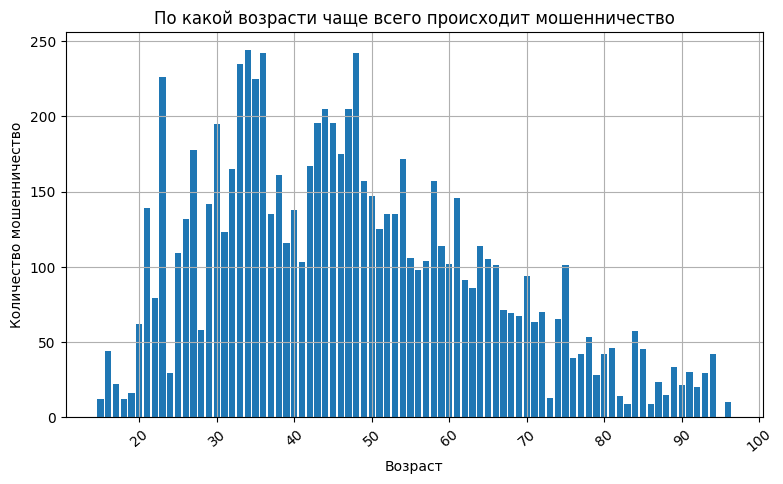

In [18]:
is_fraud = data.groupby('age')['is_fraud'].count().reset_index()

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(is_fraud['age'], is_fraud['is_fraud'])
ax.set_title('По какой возрасти чаще всего происходит мошенничество')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество мошенничество')
plt.xticks(rotation=40)

ax.grid()
plt.show()

In [73]:
age_fraud = data.groupby('age')['is_fraud'].count().sort_index()
max_fraud_age = age_fraud.idxmax()
max_fraud_count = age_fraud.max()

print(f'Максимальное кол.во с возрастом: {max_fraud_age}')

Максимальное кол.во с возрастом: 34


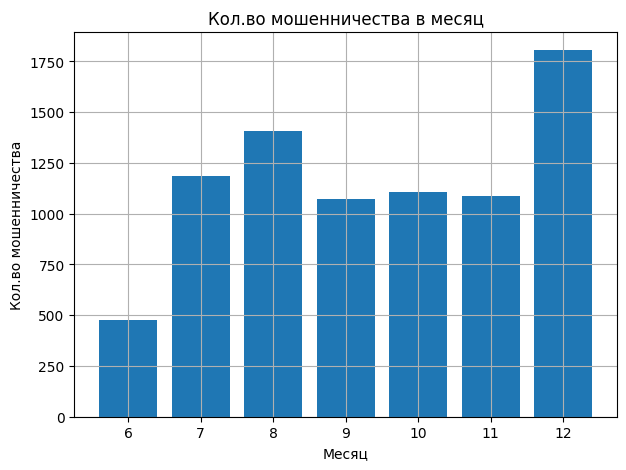

In [69]:
monthly_losses = data.groupby('month')['is_fraud'].count().reset_index()

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(monthly_losses['month'], monthly_losses['is_fraud'])
ax.set_title('Кол.во мошенничества в месяц')
ax.set_xlabel('Месяц')
ax.set_ylabel('Кол.во мошенничества')
ax.grid()
plt.show()

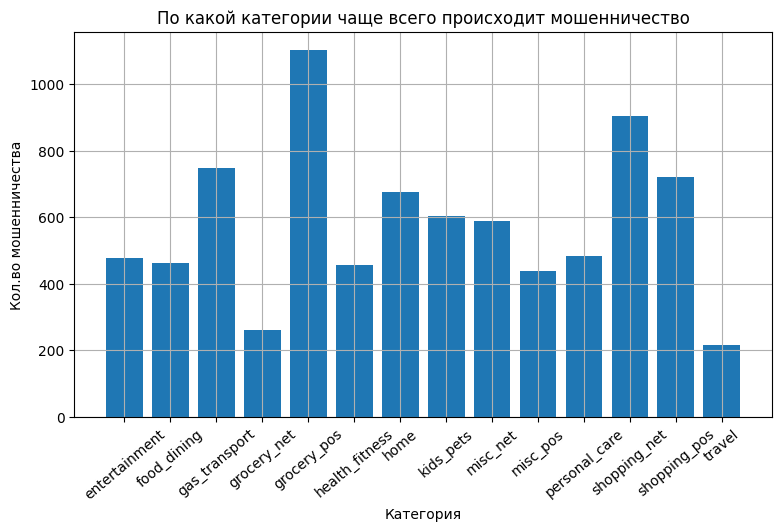

In [20]:
is_fraud = data.groupby('category')['is_fraud'].count().reset_index()

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(is_fraud['category'], is_fraud['is_fraud'])
ax.set_title('По какой категории чаще всего происходит мошенничество')
ax.set_xlabel('Категория')
ax.set_ylabel('Кол.во мошенничества')
plt.xticks(rotation=40)

ax.grid()
plt.show()

In [21]:
numeric_features = ['amt', 'gender', 'age', 'month', 'weekday']
categorical_features = ['category', 'state', 'job']
target = ['is_fraud']

In [22]:
cleaned_data[numeric_features + target].corr()

,amt,gender,age,month,weekday,is_fraud
amt,1.000000,0.046239,0.045963,-0.052344,0.055625,0.685328
gender,0.046239,1.000000,0.010889,0.025332,-0.019747,0.000719
age,0.045963,0.010889,1.000000,-0.025156,0.008142,0.047919
month,-0.052344,0.025332,-0.025156,1.000000,-0.009536,-0.090666
weekday,0.055625,-0.019747,0.008142,-0.009536,1.000000,0.080171
is_fraud,0.685328,0.000719,0.047919,-0.090666,0.080171,1.000000


In [23]:
cleaned_data[numeric_features + target].describe()

,amt,gender,age,month,weekday,is_fraud
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,188.728792,0.456957,47.327029,9.429080,2.766057,0.263294
std,296.495452,0.498174,17.550027,1.940556,2.141097,0.440447
min,1.810000,0.000000,15.000000,6.000000,0.000000,0.000000
25%,17.830000,0.000000,34.000000,8.000000,1.000000,0.000000
50%,62.690000,0.000000,45.000000,9.000000,3.000000,0.000000
75%,162.740000,1.000000,59.000000,11.000000,5.000000,1.000000
max,1320.990000,1.000000,96.000000,12.000000,6.000000,1.000000


In [24]:
data_for_split = cleaned_data[numeric_features + categorical_features + target].copy()
print(data_for_split.nunique())
data_for_split

amt         6453
gender         2
age           81
month          7
weekday        7
category      14
state         50
job          469
is_fraud       2
dtype: int64


,amt,gender,age,month,weekday,category,state,job,is_fraud
0,1320.99,0,46,9,4,shopping_pos,WA,Public house manager,0
1,1320.92,1,18,9,2,shopping_pos,KS,Chemical engineer,1
2,1319.97,0,47,8,5,shopping_pos,NE,"Engineer, automotive",1
3,1318.89,1,23,12,2,shopping_pos,AK,Commissioning editor,1
4,1311.94,1,50,8,5,misc_net,SD,Multimedia programmer,0
...,...,...,...,...,...,...,...,...,...
8138,1.83,0,75,12,6,shopping_pos,IL,Archivist,0
8139,1.83,1,44,12,2,shopping_pos,MD,Operations geologist,0
8140,1.83,0,43,9,0,misc_pos,TX,Sub,0
8141,1.83,0,54,8,0,entertainment,CA,Wellsite geologist,0


In [25]:
data_for_split = pd.get_dummies(data_for_split).astype('int')
data_for_split.shape

(8143, 539)

In [26]:
y = data_for_split[target].copy()
X = data_for_split.drop(columns=target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_train = train.drop(columns=target, axis=1).copy()
#y_train = train[target].copy()
#X_test = test.drop(columns=target, axis=1).copy()
#y_test = test[target].copy()

print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)

is_fraud
0           73.672091
1           26.327909
Name: proportion, dtype: float64
is_fraud
0           73.664825
1           26.335175
Name: proportion, dtype: float64


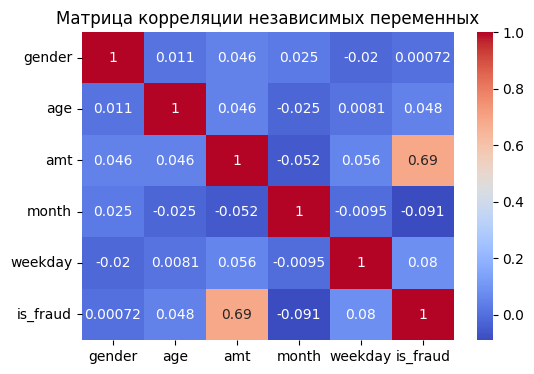

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(data_for_split[['gender', 'age', 'amt', 'month', 'weekday', 'is_fraud']].corr(), annot=True, cmap="coolwarm")
plt.title('Матрица корреляции независимых переменных')
plt.show()

<h1>Датафрейм метрик моделей

In [28]:
metrics_model = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Cross Validation Mean', 
               'ROC AUC', 'Precision', 'Recall', 'F1 Score']
})
metrics_model

,Metric
0,Train Accuracy
1,Test Accuracy
2,Cross Validation Mean
3,ROC AUC
4,Precision
5,Recall
6,F1 Score


In [29]:
def evaluate_metrics(model, model_name):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    cv_scores = cross_val_score(model, X, y, cv=100)
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))

    metrics_model[model_name] = [train_accuracy, test_accuracy, cv_scores.mean(),
                                  roc_auc, precision, recall, f1]

<h1>
<h1>Логистическая регрессия<h1>

In [55]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=200)
model_logreg.fit(X_train, y_train)

evaluate_metrics(model_logreg, 'LogisticRegression')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier,VotingClassifier,RandomForestClassifier
0,Train Accuracy,0.915874,0.850936,0.913264,0.940743,0.887627,0.979275,0.937212,0.928308
1,Test Accuracy,0.905463,0.824432,0.911602,0.934316,0.879067,0.963168,0.927563,0.918969
2,Cross Validation Mean,0.908323,0.855425,0.906186,0.926173,0.876564,0.937876,0.924545,0.908568
3,ROC AUC,0.834741,0.830661,0.850889,0.891766,0.774889,0.944298,0.876699,0.864126
4,Precision,0.939297,0.623064,0.925373,0.939891,0.975410,0.953317,0.945559,0.930435
5,Recall,0.685315,0.843823,0.722611,0.801865,0.554779,0.904429,0.769231,0.748252
6,F1 Score,0.792453,0.716832,0.811518,0.865409,0.707281,0.928230,0.848329,0.829457


from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'C': [0.01, 0.1, 1, 10, 100],                 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'max_iter': [100, 200, 300],                    
    'tol': [1e-4, 1e-3, 1e-2],                    
    'class_weight': ['balanced', None]          
}

search = RandomizedSearchCV(model_logreg, param_grid, cv=5, scoring='f1', random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

print(f"Best parameters: {search.best_params_}")
print(f"Best F1-score: {search.best_score_:.2f}")


In [31]:
model_logreg = LogisticRegression(penalty='l2', C=100, solver='lbfgs', max_iter=100, tol=0.0001, class_weight = None)
model_logreg.fit(X_train, y_train)

evaluate_metrics(model_logreg, 'LogisticRegression')
metrics_model

,Metric,LogisticRegression
0,Train Accuracy,0.909886
1,Test Accuracy,0.895641
2,Cross Validation Mean,0.899378
3,ROC AUC,0.823581
4,Precision,0.908517
5,Recall,0.671329
6,F1 Score,0.772118


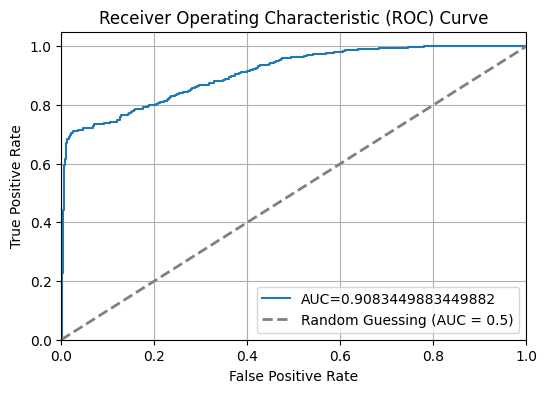

In [57]:
y_pred_proba = model_logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

<h1>Decision Tree

In [58]:
model_tree = DecisionTreeClassifier(max_depth=5)
model_tree.fit(X_train, y_train)
model = model_tree

evaluate_metrics(model_tree, 'DecisionTreeClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier,VotingClassifier,RandomForestClassifier
0,Train Accuracy,0.915874,0.948726,0.913264,0.940743,0.887627,0.979275,0.937212,0.928308
1,Test Accuracy,0.905463,0.946593,0.911602,0.934316,0.879067,0.963168,0.927563,0.918969
2,Cross Validation Mean,0.908323,0.927849,0.906186,0.926173,0.876564,0.937876,0.924545,0.908568
3,ROC AUC,0.834741,0.924811,0.850889,0.891766,0.774889,0.944298,0.876699,0.864126
4,Precision,0.939297,0.915049,0.925373,0.939891,0.975410,0.953317,0.945559,0.930435
5,Recall,0.685315,0.878788,0.722611,0.801865,0.554779,0.904429,0.769231,0.748252
6,F1 Score,0.792453,0.896552,0.811518,0.865409,0.707281,0.928230,0.848329,0.829457


In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'class_weight': [None, 'balanced']  
}
search = RandomizedSearchCV(model_tree, param_grid, cv=5, scoring='f1', random_state=42, n_jobs=-1) 
search.fit(X_train, y_train)

print(f"Best parameters: {search.best_params_}") 
print(f"Best F1-score: {search.best_score_:.2f}")

Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best F1-score: 0.72


In [35]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=5, min_samples_leaf=2, 
                                    max_features='sqrt', class_weight='balanced')
model_tree.fit(X_train, y_train)

evaluate_metrics(model_tree, 'DecisionTreeClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier
0,Train Accuracy,0.909886,0.850936
1,Test Accuracy,0.895641,0.824432
2,Cross Validation Mean,0.899378,0.855425
3,ROC AUC,0.823581,0.830661
4,Precision,0.908517,0.623064
5,Recall,0.671329,0.843823
6,F1 Score,0.772118,0.716832


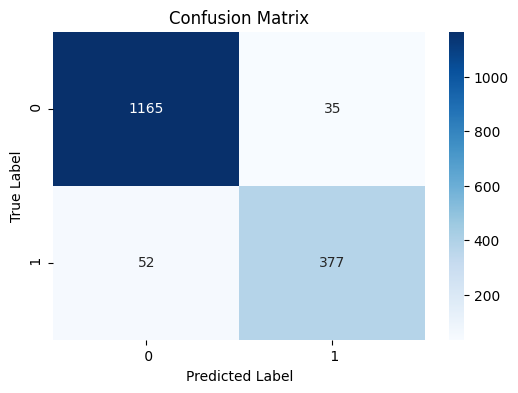

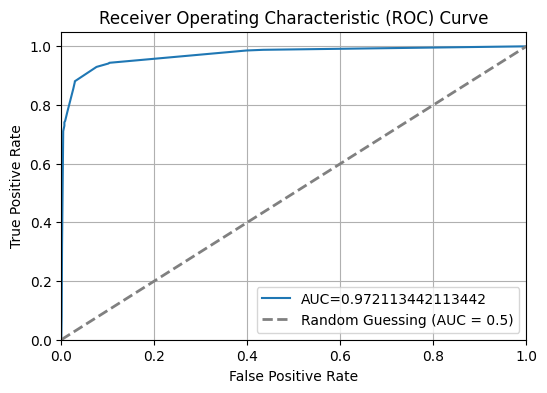

In [60]:
y_test = y_test.squeeze()
y_pred_DTree = model_tree.predict(X_test).squeeze()

confusion_matrix = pd.crosstab(y_test, model_tree.predict(X_test))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=[' 0', ' 1'],
            yticklabels=[' 0', ' 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_pred_proba = model_tree.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Boosting

In [37]:
model_abc = AdaBoostClassifier(n_estimators=3, learning_rate=0.1)
model_abc.fit(X_train, y_train)

evaluate_metrics(model_abc, 'AdaBoostClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier
0,Train Accuracy,0.909886,0.850936,0.913264
1,Test Accuracy,0.895641,0.824432,0.911602
2,Cross Validation Mean,0.899378,0.855425,0.906186
3,ROC AUC,0.823581,0.830661,0.850889
4,Precision,0.908517,0.623064,0.925373
5,Recall,0.671329,0.843823,0.722611
6,F1 Score,0.772118,0.716832,0.811518


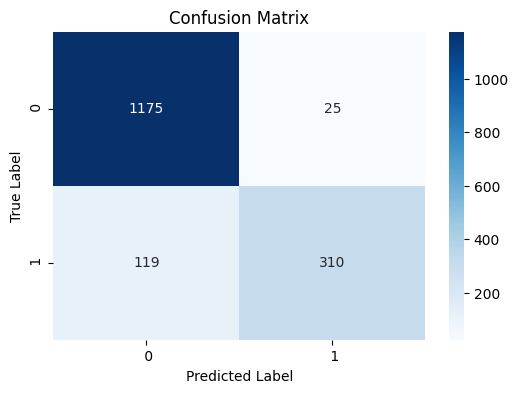

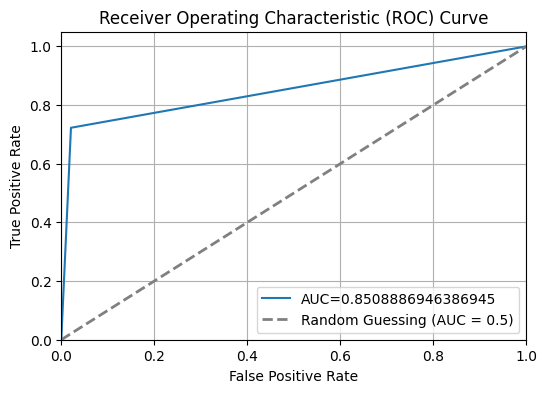

In [38]:
confusion_matrix1 = pd.crosstab(y_test, model_abc.predict(X_test))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix1, annot=True, cmap='Blues', fmt='d',
            xticklabels=[' 0', ' 1'],
            yticklabels=[' 0', ' 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred_abc = model_abc.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, model_abc.predict(X_test))
auc = metrics.roc_auc_score(y_test, model_abc.predict(X_test))

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Gradient bossting

In [39]:
GB = GradientBoostingClassifier(n_estimators=5)
GB.fit(X_train, y_train)

evaluate_metrics(GB, 'GradientBoostingClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier
0,Train Accuracy,0.909886,0.850936,0.913264,0.932760
1,Test Accuracy,0.895641,0.824432,0.911602,0.925721
2,Cross Validation Mean,0.899378,0.855425,0.906186,0.927258
3,ROC AUC,0.823581,0.830661,0.850889,0.862719
4,Precision,0.908517,0.623064,0.925373,0.984277
5,Recall,0.671329,0.843823,0.722611,0.729604
6,F1 Score,0.772118,0.716832,0.811518,0.838019


In [40]:
GB = GradientBoostingClassifier(n_estimators=19)
GB.fit(X_train, y_train)

evaluate_metrics(GB, 'GradientBoostingClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier
0,Train Accuracy,0.909886,0.850936,0.913264,0.940743
1,Test Accuracy,0.895641,0.824432,0.911602,0.934316
2,Cross Validation Mean,0.899378,0.855425,0.906186,0.926173
3,ROC AUC,0.823581,0.830661,0.850889,0.891766
4,Precision,0.908517,0.623064,0.925373,0.939891
5,Recall,0.671329,0.843823,0.722611,0.801865
6,F1 Score,0.772118,0.716832,0.811518,0.865409


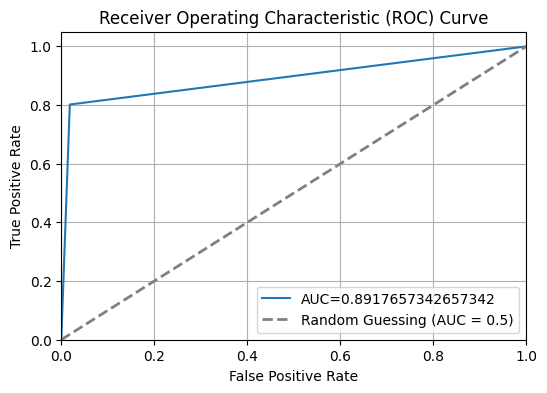

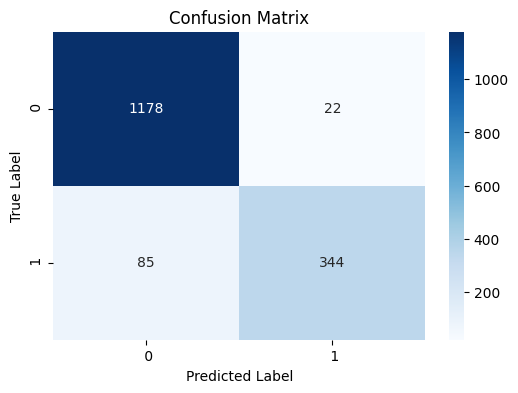

In [41]:
y_pred_gb = GB.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, GB.predict(X_test))
auc = metrics.roc_auc_score(y_test, GB.predict(X_test))

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

confusion_matrix = pd.crosstab(y_test, GB.predict(X_test))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=[' 0', ' 1'],
            yticklabels=[' 0', ' 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# XGBoost

In [42]:
import xgboost as xgb

xg_clf = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3,
                           learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_clf.fit(X_train, y_train)

evaluate_metrics(xg_clf, 'XGBClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
0,Train Accuracy,0.909886,0.850936,0.913264,0.940743,0.887627
1,Test Accuracy,0.895641,0.824432,0.911602,0.934316,0.879067
2,Cross Validation Mean,0.899378,0.855425,0.906186,0.926173,0.876564
3,ROC AUC,0.823581,0.830661,0.850889,0.891766,0.774889
4,Precision,0.908517,0.623064,0.925373,0.939891,0.975410
5,Recall,0.671329,0.843823,0.722611,0.801865,0.554779
6,F1 Score,0.772118,0.716832,0.811518,0.865409,0.707281


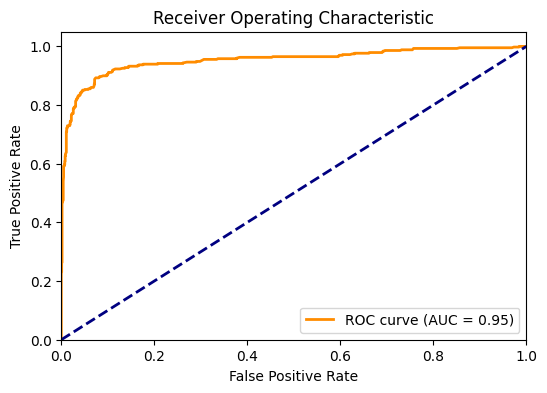

In [43]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = xg_clf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# CATBOOST

In [44]:
from catboost import CatBoostClassifier

In [45]:

model_cat = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42)
model_cat.fit(X_train, y_train)

evaluate_metrics(model_cat, 'CatBoostClassifier')
metrics_model

0:	learn: 0.5988073	total: 154ms	remaining: 15.2s
1:	learn: 0.5204555	total: 164ms	remaining: 8.01s
2:	learn: 0.4658733	total: 173ms	remaining: 5.6s
3:	learn: 0.4209538	total: 181ms	remaining: 4.35s
4:	learn: 0.3890680	total: 190ms	remaining: 3.61s
5:	learn: 0.3379397	total: 199ms	remaining: 3.12s
6:	learn: 0.2981030	total: 208ms	remaining: 2.76s
7:	learn: 0.2762333	total: 216ms	remaining: 2.49s
8:	learn: 0.2531722	total: 225ms	remaining: 2.28s
9:	learn: 0.2395650	total: 234ms	remaining: 2.11s
10:	learn: 0.2293826	total: 245ms	remaining: 1.98s
11:	learn: 0.2146752	total: 253ms	remaining: 1.85s
12:	learn: 0.2082294	total: 262ms	remaining: 1.76s
13:	learn: 0.1947997	total: 272ms	remaining: 1.67s
14:	learn: 0.1858565	total: 280ms	remaining: 1.59s
15:	learn: 0.1767170	total: 289ms	remaining: 1.52s
16:	learn: 0.1711413	total: 299ms	remaining: 1.46s
17:	learn: 0.1654521	total: 308ms	remaining: 1.4s
18:	learn: 0.1597574	total: 318ms	remaining: 1.35s
19:	learn: 0.1551914	total: 328ms	remaining

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier
0,Train Accuracy,0.909886,0.850936,0.913264,0.940743,0.887627,0.973135
1,Test Accuracy,0.895641,0.824432,0.911602,0.934316,0.879067,0.959484
2,Cross Validation Mean,0.899378,0.855425,0.906186,0.926173,0.876564,0.937508
3,ROC AUC,0.823581,0.830661,0.850889,0.891766,0.774889,0.937305
4,Precision,0.908517,0.623064,0.925373,0.939891,0.975410,0.952618
5,Recall,0.671329,0.843823,0.722611,0.801865,0.554779,0.890443
6,F1 Score,0.772118,0.716832,0.811518,0.865409,0.707281,0.920482


In [46]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'iterations': [100, 125, 150],
    'depth': [4, 5, 6],
    'learning_rate': [0.1, 0.2, 3]
}
search = RandomizedSearchCV(model_cat, param_grid, cv=6, scoring='f1', random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

print(f"Best parameters: {search.best_params_}")
print(f"Best F1-score: {search.best_score_:.2f}")

0:	learn: 0.5988073	total: 10.4ms	remaining: 1.55s
1:	learn: 0.5204555	total: 19.3ms	remaining: 1.43s
2:	learn: 0.4658733	total: 26.2ms	remaining: 1.28s
3:	learn: 0.4209538	total: 33.7ms	remaining: 1.23s
4:	learn: 0.3890680	total: 39.7ms	remaining: 1.15s
5:	learn: 0.3379397	total: 46.4ms	remaining: 1.11s
6:	learn: 0.2981030	total: 55.4ms	remaining: 1.13s
7:	learn: 0.2762333	total: 65.8ms	remaining: 1.17s
8:	learn: 0.2531722	total: 74.9ms	remaining: 1.17s
9:	learn: 0.2395650	total: 83.4ms	remaining: 1.17s
10:	learn: 0.2293826	total: 91.7ms	remaining: 1.16s
11:	learn: 0.2146752	total: 99.8ms	remaining: 1.15s
12:	learn: 0.2082294	total: 107ms	remaining: 1.13s
13:	learn: 0.1947997	total: 115ms	remaining: 1.12s
14:	learn: 0.1858565	total: 121ms	remaining: 1.09s
15:	learn: 0.1767170	total: 126ms	remaining: 1.05s
16:	learn: 0.1711413	total: 131ms	remaining: 1.02s
17:	learn: 0.1654521	total: 136ms	remaining: 994ms
18:	learn: 0.1597574	total: 140ms	remaining: 967ms
19:	learn: 0.1551914	total: 1

In [47]:
model_cat = CatBoostClassifier(iterations=150, depth=6, learning_rate=0.1, random_state=42)
model_cat.fit(X_train, y_train)

evaluate_metrics(model_cat, 'CatBoostClassifier')

0:	learn: 0.5988073	total: 4.58ms	remaining: 683ms
1:	learn: 0.5204555	total: 8.96ms	remaining: 663ms
2:	learn: 0.4658733	total: 12.9ms	remaining: 630ms
3:	learn: 0.4209538	total: 17.1ms	remaining: 626ms
4:	learn: 0.3890680	total: 21.3ms	remaining: 618ms
5:	learn: 0.3379397	total: 25.1ms	remaining: 603ms
6:	learn: 0.2981030	total: 28.7ms	remaining: 586ms
7:	learn: 0.2762333	total: 32.2ms	remaining: 572ms
8:	learn: 0.2531722	total: 35.8ms	remaining: 560ms
9:	learn: 0.2395650	total: 39.3ms	remaining: 551ms
10:	learn: 0.2293826	total: 43ms	remaining: 543ms
11:	learn: 0.2146752	total: 47ms	remaining: 540ms
12:	learn: 0.2082294	total: 51ms	remaining: 538ms
13:	learn: 0.1947997	total: 54.7ms	remaining: 531ms
14:	learn: 0.1858565	total: 58.2ms	remaining: 524ms
15:	learn: 0.1767170	total: 61.8ms	remaining: 517ms
16:	learn: 0.1711413	total: 65.4ms	remaining: 512ms
17:	learn: 0.1654521	total: 69ms	remaining: 506ms
18:	learn: 0.1597574	total: 72.6ms	remaining: 501ms
19:	learn: 0.1551914	total: 76

In [61]:
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier,VotingClassifier,RandomForestClassifier
0,Train Accuracy,0.915874,0.948726,0.913264,0.940743,0.887627,0.979275,0.937212,0.928308
1,Test Accuracy,0.905463,0.946593,0.911602,0.934316,0.879067,0.963168,0.927563,0.918969
2,Cross Validation Mean,0.908323,0.927849,0.906186,0.926173,0.876564,0.937876,0.924545,0.908568
3,ROC AUC,0.834741,0.924811,0.850889,0.891766,0.774889,0.944298,0.876699,0.864126
4,Precision,0.939297,0.915049,0.925373,0.939891,0.975410,0.953317,0.945559,0.930435
5,Recall,0.685315,0.878788,0.722611,0.801865,0.554779,0.904429,0.769231,0.748252
6,F1 Score,0.792453,0.896552,0.811518,0.865409,0.707281,0.928230,0.848329,0.829457


In [49]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('LogReg', model_logreg),
    ('DecisionTree', model_tree),
    ('AdaBoost', model_abc),
    ('GradientBoost', GB),
    #('XGBoost', xg_clf),
    ('CatBoost', model_cat)
], voting='soft')

voting_clf.fit(X_train, y_train)

evaluate_metrics(voting_clf, 'VotingClassifier')

0:	learn: 0.5988073	total: 6.06ms	remaining: 903ms
1:	learn: 0.5204555	total: 11.6ms	remaining: 859ms
2:	learn: 0.4658733	total: 16ms	remaining: 784ms
3:	learn: 0.4209538	total: 21.6ms	remaining: 789ms
4:	learn: 0.3890680	total: 27.5ms	remaining: 797ms
5:	learn: 0.3379397	total: 33.9ms	remaining: 813ms
6:	learn: 0.2981030	total: 40.4ms	remaining: 825ms
7:	learn: 0.2762333	total: 47.4ms	remaining: 841ms
8:	learn: 0.2531722	total: 55ms	remaining: 861ms
9:	learn: 0.2395650	total: 61.9ms	remaining: 866ms
10:	learn: 0.2293826	total: 69.7ms	remaining: 880ms
11:	learn: 0.2146752	total: 77.7ms	remaining: 893ms
12:	learn: 0.2082294	total: 85.8ms	remaining: 904ms
13:	learn: 0.1947997	total: 94.3ms	remaining: 916ms
14:	learn: 0.1858565	total: 103ms	remaining: 926ms
15:	learn: 0.1767170	total: 112ms	remaining: 939ms
16:	learn: 0.1711413	total: 122ms	remaining: 954ms
17:	learn: 0.1654521	total: 130ms	remaining: 956ms
18:	learn: 0.1597574	total: 139ms	remaining: 957ms
19:	learn: 0.1551914	total: 148

In [50]:
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier,VotingClassifier
0,Train Accuracy,0.909886,0.850936,0.913264,0.940743,0.887627,0.979275,0.937212
1,Test Accuracy,0.895641,0.824432,0.911602,0.934316,0.879067,0.963168,0.927563
2,Cross Validation Mean,0.899378,0.855425,0.906186,0.926173,0.876564,0.937876,0.924545
3,ROC AUC,0.823581,0.830661,0.850889,0.891766,0.774889,0.944298,0.876699
4,Precision,0.908517,0.623064,0.925373,0.939891,0.975410,0.953317,0.945559
5,Recall,0.671329,0.843823,0.722611,0.801865,0.554779,0.904429,0.769231
6,F1 Score,0.772118,0.716832,0.811518,0.865409,0.707281,0.928230,0.848329


In [74]:
feature_importances = model_cat.get_feature_importance()

feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                     Feature  Importance
0                                        amt   54.055436
7                     category_gas_transport    6.703715
9                       category_grocery_pos    5.550303
11                             category_home    4.803664
17                     category_shopping_pos    3.959176
..                                       ...         ...
218          job_Engineer, building services    0.000000
217  job_Engineer, broadcasting (operations)    0.000000
214               job_Engineer, agricultural    0.000000
213               job_Engineer, aeronautical    0.000000
537                               job_Writer    0.000000

[538 rows x 2 columns]


<h1>RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

evaluate_metrics(rf_clf, 'RandomForestClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier,VotingClassifier,RandomForestClassifier
0,Train Accuracy,0.909886,0.850936,0.913264,0.940743,0.887627,0.979275,0.937212,1.000000
1,Test Accuracy,0.895641,0.824432,0.911602,0.934316,0.879067,0.963168,0.927563,0.965623
2,Cross Validation Mean,0.899378,0.855425,0.906186,0.926173,0.876564,0.937876,0.924545,0.956775
3,ROC AUC,0.823581,0.830661,0.850889,0.891766,0.774889,0.944298,0.876699,0.940723
4,Precision,0.908517,0.623064,0.925373,0.939891,0.975410,0.953317,0.945559,0.979434
5,Recall,0.671329,0.843823,0.722611,0.801865,0.554779,0.904429,0.769231,0.888112
6,F1 Score,0.772118,0.716832,0.811518,0.865409,0.707281,0.928230,0.848329,0.931540


In [53]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],          
    'criterion': ['gini', 'entropy'],         
    'max_depth': [None, 10, 20],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 3],             
    'max_features': ['sqrt', 'log2'],          
    'class_weight': ['balanced', 'balanced_subsample'],  
    'bootstrap': [True, False],                
    'random_state': [42]                       

search = RandomizedSearchCV(rf_clf, param_grid, cv=10, scoring='f1', random_state=42, n_jobs=-1) 
search.fit(X_train, y_train)

print(f"Best parameters: {search.best_params_}") 
print(f"Best F1-score: {search.best_score_:.2f}")

Best parameters: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}
Best F1-score: 0.93


In [54]:
rf_clf = RandomForestClassifier(
    n_estimators=100,          
    criterion='gini',         
    max_depth=10,             
    min_samples_split=10,      
    min_samples_leaf=1,       
    max_features='sqrt',       
    class_weight='balanced',   
    random_state=42,           
    n_jobs=-1,                
    bootstrap=False           
)
rf_clf.fit(X_train, y_train)

evaluate_metrics(rf_clf, 'RandomForestClassifier')
metrics_model

,Metric,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier,VotingClassifier,RandomForestClassifier
0,Train Accuracy,0.909886,0.850936,0.913264,0.940743,0.887627,0.979275,0.937212,0.928308
1,Test Accuracy,0.895641,0.824432,0.911602,0.934316,0.879067,0.963168,0.927563,0.918969
2,Cross Validation Mean,0.899378,0.855425,0.906186,0.926173,0.876564,0.937876,0.924545,0.908568
3,ROC AUC,0.823581,0.830661,0.850889,0.891766,0.774889,0.944298,0.876699,0.864126
4,Precision,0.908517,0.623064,0.925373,0.939891,0.975410,0.953317,0.945559,0.930435
5,Recall,0.671329,0.843823,0.722611,0.801865,0.554779,0.904429,0.769231,0.748252
6,F1 Score,0.772118,0.716832,0.811518,0.865409,0.707281,0.928230,0.848329,0.829457
